<a href="https://colab.research.google.com/github/Thirtha17/Blackhole-Simulator/blob/main/python/blackhole_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blackhole Simulator (Colab Demo)

This notebook runs the GPU renderer from `python/gpu_renderer.py` with interactive camera controls.

In [1]:
# Optional: install widget support
!pip -q install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.0 MB/s eta 0:00:00


In [2]:
# Repo setup (works in Colab and local Jupyter)
import os
import sys
import subprocess
from pathlib import Path

REPO_URL = "https://github.com/Thirtha17/Blackhole-Simulator.git"

in_colab = 'google.colab' in sys.modules
cwd = Path.cwd().resolve()

def is_repo_root(path: Path) -> bool:
    return (path / 'src').exists() and (path / 'python').exists()

if in_colab:
    repo_dir = Path('/content/bh_sim')
    if not repo_dir.exists():
        subprocess.check_call(['git', 'clone', REPO_URL, str(repo_dir)])
else:
    if is_repo_root(cwd):
        repo_dir = cwd
    elif is_repo_root(cwd.parent):
        repo_dir = cwd.parent
    else:
        repo_dir = cwd / 'bh_sim'
        if not repo_dir.exists():
            subprocess.check_call(['git', 'clone', REPO_URL, str(repo_dir)])

os.chdir(repo_dir)
print('Working directory:', Path.cwd())


Working directory: /content/bh_sim


In [3]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.insert(0, str(Path('python').resolve()))
from gpu_renderer import render_sky_with_bh_gpu

plt.style.use('dark_background')

print('torch:', torch.__version__)
print('cuda available:', torch.cuda.is_available())
print('mps available:', hasattr(torch.backends, 'mps') and torch.backends.mps.is_available())

torch: 2.9.0+cu128
cuda available: True
mps available: False


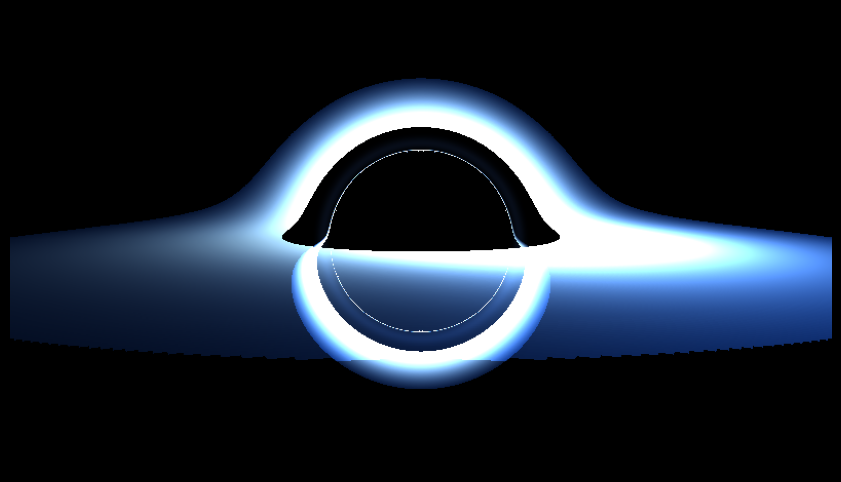

In [6]:
# Single render
img = render_sky_with_bh_gpu(
    width=800,
    height=450,
    fov_deg=50.0,
    bh_angular_radius_deg=4.8,
    lens_strength=0.55,
    cam_yaw_deg=0.0,
    cam_pitch_deg=5.0,
    cam_distance_scale=1.0,
    max_steps=1400,
).numpy().astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# Interactive controls
from ipywidgets import interact, FloatSlider

@interact(
    pitch=FloatSlider(min=-20, max=85, step=5, value=6, description='Pitch'),
    distance=FloatSlider(min=0.4, max=2.0, step=0.1, value=1.0, description='Distance'),
    steps=FloatSlider(min=300, max=1400, step=100, value=700, description='Steps')
)
def render_interactive(pitch=6.0, distance=1.0, steps=700):
    img = render_sky_with_bh_gpu(
        width=640,
        height=360,
        fov_deg=50.0,
        bh_angular_radius_deg=4.8,
        lens_strength=0.55,
        cam_yaw_deg=0.0,
        cam_pitch_deg=float(pitch),
        cam_distance_scale=float(distance),
        max_steps=int(steps),
    ).numpy().astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

interactive(children=(FloatSlider(value=6.0, description='Pitch', max=85.0, min=-20.0, step=5.0), FloatSlider(…